In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv

In [4]:
features = pd.read_csv('C:/Users/biank/Downloads/AI-class-main/titanic.csv', index_col = 0)

In [5]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
features

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [7]:
#결측치 확인
features.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [28]:
#결측치가 아닌 데이터가 800개 이하인 칼럼 삭제 (age와 cabin 칼럼 삭제)
features.dropna(axis=1, thresh=800)
features.dropna(axis=0)

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S


In [ ]:
#Survived를 타겟 레이블로 삼아서 EDA 수행

Text(0.5, 1.0, 'Pclass')

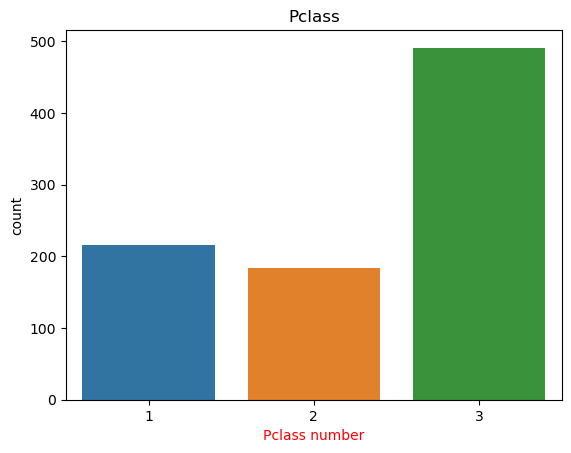

In [29]:
#1. Pclass 레이블별 갯수 및 차트표시
sns.countplot(x='Pclass', data=features)
plt.xlabel('Pclass number', color='red')
plt.ylabel('count')
plt.title('Pclass')

Text(0.5, 1.0, 'Survived')

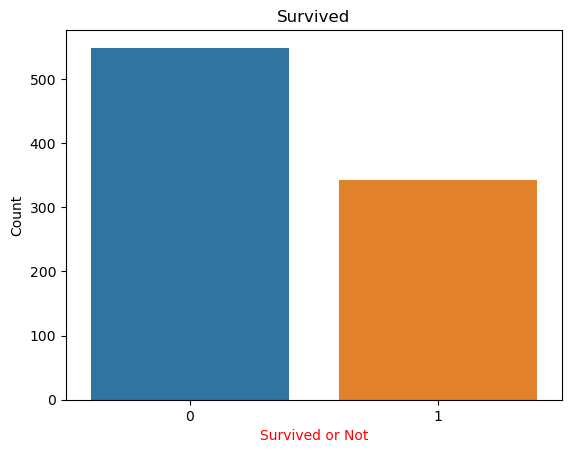

In [30]:
#2. 생존자와 사망자 총 숫자 및 차트표시
sns.countplot(x = 'Survived', data = features)
plt.xlabel('Survived or Not', color='red')
plt.ylabel('Count')
plt.title('Survived')

In [31]:
#3. 성별, 티켓클래스(Pclass), 생존여부(Survived) 상관관계 분석
features_pivot = pd.pivot_table(index = 'Sex', columns = 'Pclass', values = 'Survived', data = features)
features_pivot

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Text(0.5, 1.0, 'Correlation analysis')

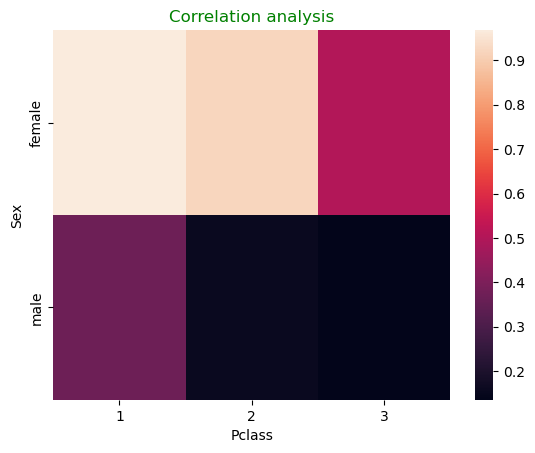

In [32]:
sns.heatmap(features_pivot)
plt.title('Correlation analysis', color='green')

In [ ]:
#4. X_train, y_train, X_test, y_test로 나누고 생존여부(Survived)에 따라 각각 분류(SVM, LR, DT, RT, KNN) 수행